# Mount Drive with Colab

In [82]:
from google.colab import drive
drive.mount("/content/mydrive/")

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


# Import Libraries

In [83]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16

# Load Dataset

In [84]:
directory_link="/content/mydrive/MyDrive/dataset/Forest Fire Classification/Forest Fire Dataset/"
directory=os.listdir(directory_link)
print("Names of Directory :" , directory )
print("Number of Directory :" , len(directory))

Names of Directory : ['Testing', 'Training']
Number of Directory : 2


# Preprocessing and Feature Engineering

In [85]:
data='/content/mydrive/MyDrive/dataset/Forest Fire Classification/Forest Fire Dataset/Training'

In [86]:
batch_size = 32
img_height = 180
img_width = 180

In [87]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 1216 files for training.


In [88]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 304 files for validation.


In [89]:
class_names = train_ds.class_names
print("Class:" , class_names)
print("No of Classes :" , len(class_names))

Class: ['fire', 'nofire']
No of Classes : 2


# Visulization

### RGB Images

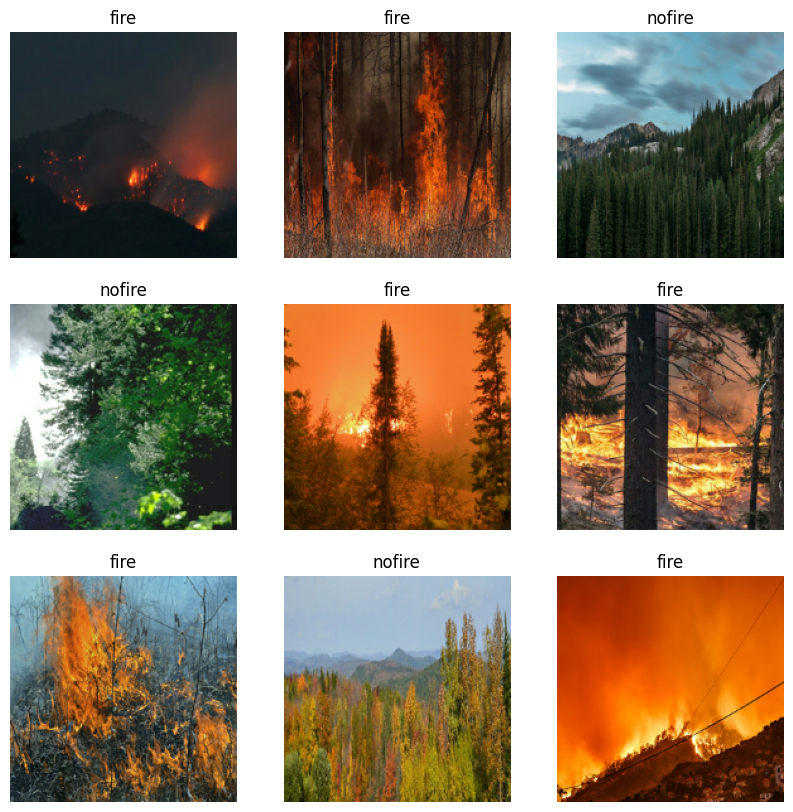

In [90]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

### RGB Images Convert Into GrayScale

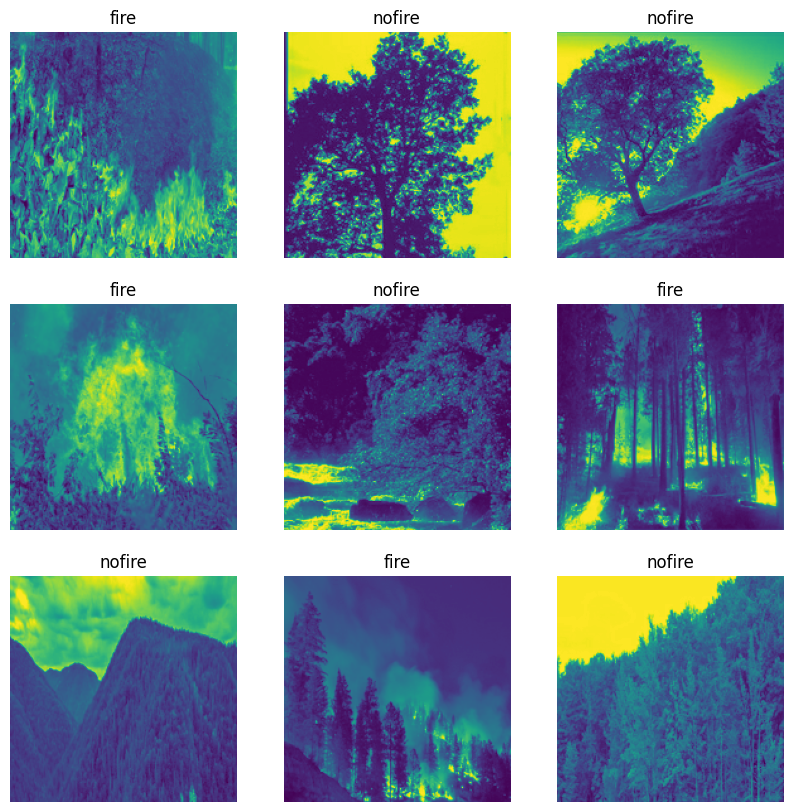

In [91]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])

    plt.imshow(gray_image.numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")


### Normalize Images

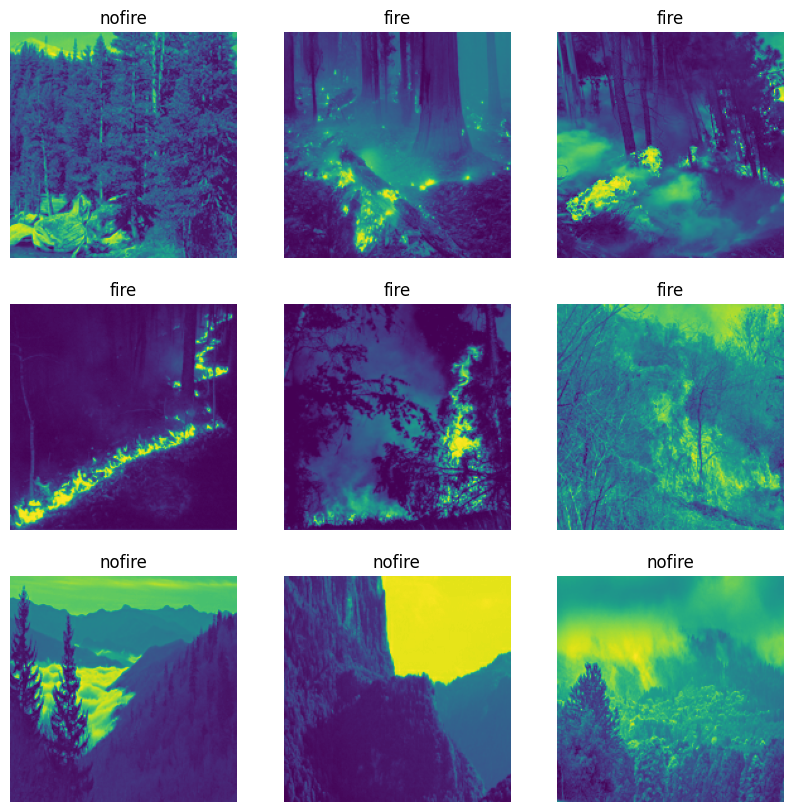

In [92]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])
    norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    plt.imshow(norm_image)
    plt.title(class_names[label[i]])
    plt.axis("off")

# Conv2D Network

Model Building

In [93]:
num_classes = len(class_names)

model_conv2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [94]:
model_conv2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
model_conv2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [96]:
epochs=10
history = model_conv2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 0.3079 - accuracy: 0.8684 - val_loss: 0.2558 - val_accuracy: 0.8914
Epoch 2/10
38/38 [==============================] - 48s 1s/step - loss: 0.1656 - accuracy: 0.9400 - val_loss: 0.1354 - val_accuracy: 0.9605
Epoch 3/10
38/38 [==============================] - 46s 1s/step - loss: 0.0899 - accuracy: 0.9671 - val_loss: 0.1201 - val_accuracy: 0.9638
Epoch 4/10
38/38 [==============================] - 48s 1s/step - loss: 0.0812 - accuracy: 0.9778 - val_loss: 0.1216 - val_accuracy: 0.9638
Epoch 5/10
38/38 [==============================] - 47s 1s/step - loss: 0.0529 - accuracy: 0.9819 - val_loss: 0.1365 - val_accuracy: 0.9572
Epoch 6/10
38/38 [==============================] - 48s 1s/step - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.2153 - val_accuracy: 0.9342
Epoch 7/10
38/38 [==============================] - 49s 1s/step - loss: 0.0415 - accuracy: 0.9827 - val_loss: 0.1531 - val_accuracy: 0.9507
Epoch 8/10
38/38 [==

### Evaluation

In [97]:
test_ds=model_conv2.evaluate(val_ds)


10/10 [==============================] - 4s 393ms/step - loss: 0.1433 - accuracy: 0.9638


### Classification Report

In [98]:
true_labels = []
predicted_labels = []
val_preds = model_conv2.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

10/10 [==============================] - 4s 252ms/step
                    0           1  accuracy   macro avg  weighted avg
precision    0.537975    0.520548  0.529605    0.529261      0.529433
recall       0.548387    0.510067  0.529605    0.529227      0.529605
f1-score     0.543131    0.515254  0.529605    0.529193      0.529468
support    155.000000  149.000000  0.529605  304.000000    304.000000


### Create plots of the loss and accuracy on the training and validation sets

Text(0.5, 1.0, 'Training and Validation Accuracy')

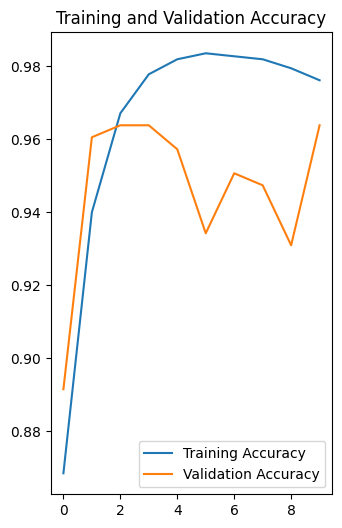

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

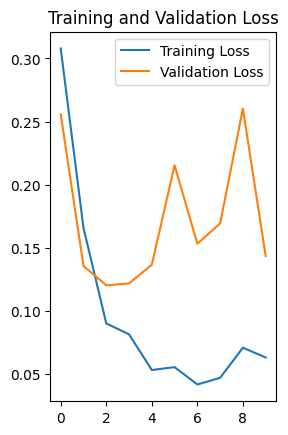

In [100]:

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### ResNet50 Model

Build the Model

In [101]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
for layer in resnet_50.layers:
    layer.trainable = False

In [102]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [103]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [104]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
38/38 [==============================] - 215s 6s/step - loss: 0.8169 - accuracy: 0.7015 - val_loss: 0.1160 - val_accuracy: 0.9671
Epoch 2/10
38/38 [==============================] - 208s 6s/step - loss: 0.1860 - accuracy: 0.9285 - val_loss: 0.0850 - val_accuracy: 0.9737
Epoch 3/10
38/38 [==============================] - 203s 5s/step - loss: 0.1283 - accuracy: 0.9515 - val_loss: 0.0684 - val_accuracy: 0.9836
Epoch 4/10
38/38 [==============================] - 209s 5s/step - loss: 0.0774 - accuracy: 0.9778 - val_loss: 0.0595 - val_accuracy: 0.9836
Epoch 5/10
38/38 [==============================] - 211s 6s/step - loss: 0.0520 - accuracy: 0.9852 - val_loss: 0.0806 - val_accuracy: 0.9704
Epoch 6/10
38/38 [==============================] - 247s 7s/step - loss: 0.0781 - accuracy: 0.9729 - val_loss: 0.0525 - val_accuracy: 0.9737
Epoch 7/10
38/38 [==============================] - 247s 6s/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.0501 - val_accuracy: 0.9803
Epoch 8/10
38

# Evaluation

In [105]:
test_ds=model.evaluate(val_ds)

10/10 [==============================] - 42s 4s/step - loss: 0.1144 - accuracy: 0.9704


# Classification Report

In [106]:
true_labels = []
predicted_labels = []
val_preds = model.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

10/10 [==============================] - 42s 4s/step
                    0           1  accuracy   macro avg  weighted avg
precision    0.493333    0.474026  0.483553    0.483680      0.483870
recall       0.477419    0.489933  0.483553    0.483676      0.483553
f1-score     0.485246    0.481848  0.483553    0.483547      0.483581
support    155.000000  149.000000  0.483553  304.000000    304.000000


### Create plots of the loss and accuracy on the training and validation sets

Text(0.5, 1.0, 'Training and Validation Accuracy')

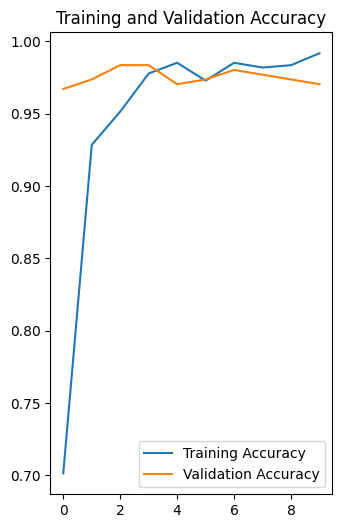

In [107]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

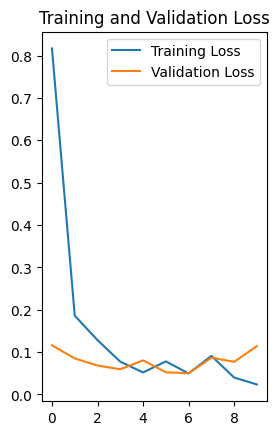

In [108]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# VGG16

Model Build with 16 Convolutional Layers

In [109]:
IMG_SIZE=(img_height, img_width)
vgg16_weight_path = '/content/vgg.h5'
base_model = tf.keras.applications.VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

model_vgg16 = tf.keras.models.Sequential()
model_vgg16.add(base_model)
model_vgg16.add(tf.keras.layers.Flatten())
model_vgg16.add(tf.keras.layers.Dropout(0.5))
model_vgg16.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_vgg16.layers[0].trainable = False

model_vgg16.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_21 (Flatten)        (None, 12800)             0         
                                                                 
 dropout_21 (Dropout)        (None, 12800)             0         
                                                                 
 dense_52 (Dense)            (None, 1)                 12801     
                                                                 
Total params: 14727489 (56.18 MB)
Trainable params: 12801 (50.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [110]:
EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)

history = model_vgg16.fit_generator(
    train_ds,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=25,
    callbacks=[early_stopping]
)

Epoch 1/10


<ipython-input-110-dc0ecb5c903b>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg16.fit_generator(


38/50 [=====================>........] - ETA: 2:32 - loss: 1.3930 - accuracy: 0.8363

50/50 [==============================] - 631s 13s/step - loss: 1.3930 - accuracy: 0.8363 - val_loss: 0.6140 - val_accuracy: 0.9276


# Evaluate

In [113]:
test_ds=model_vgg16.evaluate(val_ds)

10/10 [==============================] - 127s 12s/step - loss: 0.6140 - accuracy: 0.9276


In [114]:
true_labels = []
predicted_labels = []
val_preds = model_vgg16.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

10/10 [==============================] - 121s 12s/step
                    0      1  accuracy   macro avg  weighted avg
precision    0.509868    0.0  0.509868    0.254934      0.259966
recall       1.000000    0.0  0.509868    0.500000      0.509868
f1-score     0.675381    0.0  0.509868    0.337691      0.344356
support    155.000000  149.0  0.509868  304.000000    304.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
